# Restaurant Revenue Models

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


# Data Sets

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submissions = pd.read_csv('data/sampleSubmission.csv')

# Ridge Model

In [3]:
#Dropping unnecessary columns
train.drop(columns=["Id", "City","Open Date"], inplace=True)
test.drop(columns=["Id", "City","Open Date"], inplace=True)


#Dummifiying object columns
test = pd.get_dummies(test, columns=["City Group", "Type", ], dtype="int")
train = pd.get_dummies(train, columns=["City Group", "Type", ], dtype="int")

#Dropping remainder columns so that DF columns match.
test.drop(columns="Type_MB", inplace=True)

#Checking consistency
print(train.shape)
print(test.shape)

#Performing train test split
X = train.drop(columns="revenue")
y = train["revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=22)

ridge_params = {
    "model__alpha": [100,250, 350, 450,500],
    "model__fit_intercept": [True, False],
    "model__solver": ["auto", "svd", "cholesky", "lsqr", "saga"],
    "model__tol": [.0001,.001, .01, .1]
}

#Creating a pipeline for Ridge Model
Ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())
])

ridge_grid = GridSearchCV(Ridge_pipe, ridge_params)

ridge_grid.fit(X_train, y_train)

ridge_grid.best_params_

mean_squared_error(y_test, ridge_grid.predict(X_test), squared=False)

(137, 43)
(100000, 42)


1904919.6103076546

# Lasso Model

In [4]:
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Setting up parameters
param_grid = {
    'lasso__alpha': [0.01, 0.1, 0.5, 0.75, 1.0],
    'lasso__fit_intercept': [True, False],
    'lasso__positive': [True, False],
    'lasso__max_iter': [250, 350, 500, 1000, 2000, 3000]
}

# Perform grid search
grid_search = GridSearchCV(lasso_pipe, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", -best_score)
test_preds = grid_search.predict(test)

Best Parameters: {'lasso__alpha': 1.0, 'lasso__fit_intercept': True, 'lasso__max_iter': 350, 'lasso__positive': True}
Best Score: 0.4824665105742175


## Graphs

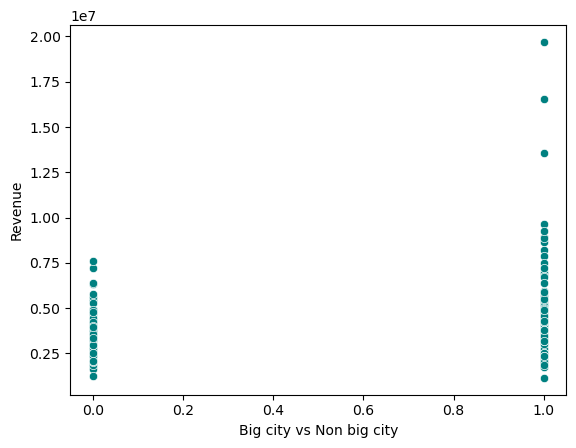

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=train, x="City Group_Big Cities", y = "revenue", color = "teal");
plt.xlabel("Big city vs Non big city");
plt.ylabel("Revenue");
plt.show()

# Feature Importance Plot
The coefficients of the features learned by the Ridge model

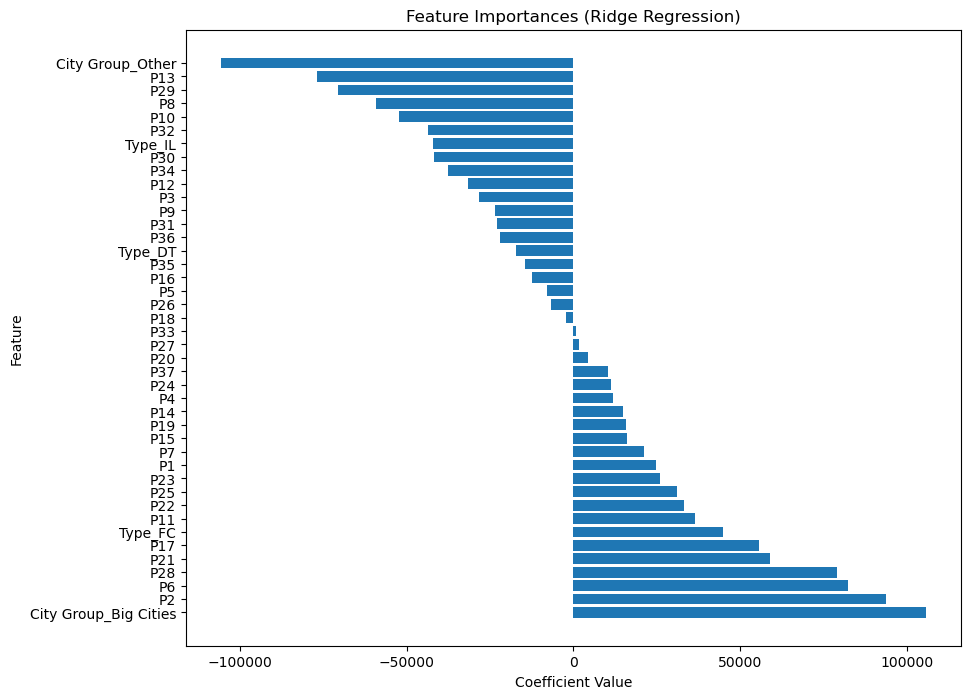

In [6]:
ridge_coefs = ridge_grid.best_estimator_.named_steps['model'].coef_

feature_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_coefs})
feature_coefs = feature_coefs.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_coefs['Feature'], feature_coefs['Coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importances (Ridge Regression)")
plt.show()

# Residuals Plot 
The differences between actual and predicted values

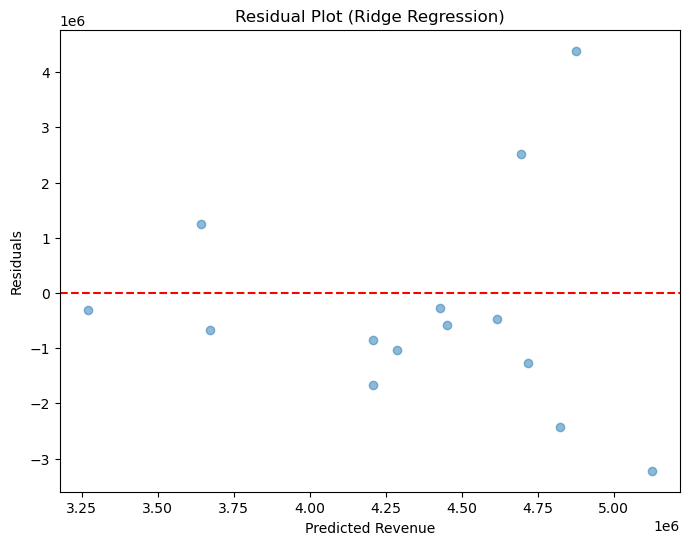

In [7]:
residuals = y_test - ridge_grid.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(ridge_grid.predict(X_test), residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.title("Residual Plot (Ridge Regression)")
plt.show()

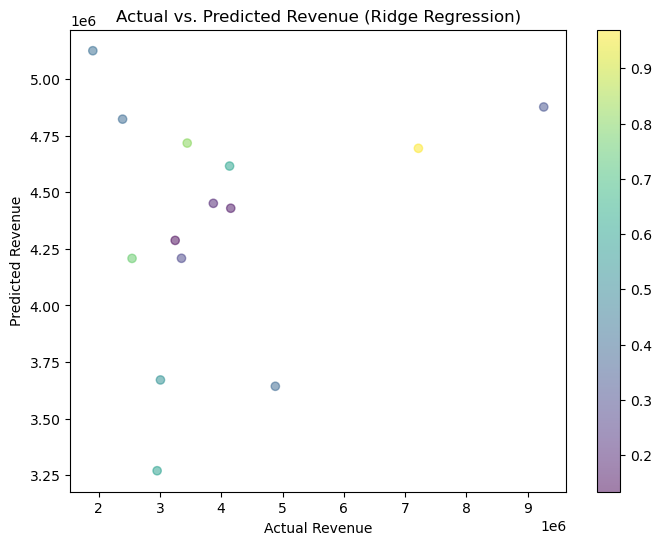

In [8]:
import matplotlib.pyplot as plt
import numpy as np

colors = np.random.rand(len(y_test)) 

plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_grid.predict(X_test), c=colors, alpha=0.5)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs. Predicted Revenue (Ridge Regression)")
plt.colorbar() 
plt.show()